In [280]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/electricity/electricity_record.csv')
df.head(5)

,DateTime,grid,solar
0,2018/11/1 0:00,0.606,-0.008
1,2018/11/1 0:15,0.689,-0.009
2,2018/11/1 0:30,0.721,-0.009
3,2018/11/1 0:45,0.725,-0.009
4,2018/11/1 1:00,0.553,-0.009


In [281]:
df['year'] = ''
df['month'] = ''
df['date'] = ''
df['day'] = ''
day = 3
date = '2018/11/1'

for index, row in df.iterrows():
    if date != row['DateTime'].split(' ')[0]:
        date = row['DateTime'].split(' ')[0]
        day += 1
        day %= 7
    y, m, d = df.at[index, 'DateTime'].split(' ')[0].split('/')
    df.at[index, 'year'] = int(y)
    df.at[index, 'month'] = int(m)
    df.at[index, 'date'] = int(d)
    df.at[index, 'day'] = day
    
df.drop(['DateTime'], axis=1, inplace=True)

In [282]:
df = df.groupby(['year', 'month', 'date', 'day']).sum()
df.head(5)

grid   solar
year month date day                
2018 11    1    3   -49.979  95.650
           2    4   -49.865  94.453
           3    5   -35.588  89.085
           4    6   -35.213  86.703
           5    0    -7.164  49.697

In [265]:
df['demand'] = ''

for index, row in df.iterrows():
    df.at[index, 'demand'] = (df.at[index, 'grid'] + df.at[index, 'solar'])
df.head(5)

grid   solar  demand
year month date day                        
2018 11    1    1   -49.979  95.650  45.671
           2    2   -49.865  94.453  44.588
           3    3   -35.588  89.085  53.497
           4    4   -35.213  86.703   51.49
           5    5    -7.164  49.697  42.533

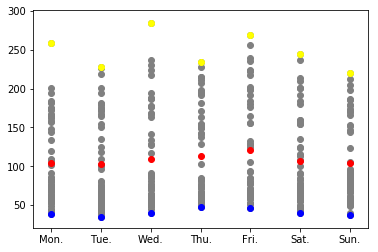

In [266]:
_, _, _, d = zip(*df.index.values)

maxDemand = df.groupby(['day'])['demand'].apply(max)
minDemand = df.groupby(['day'])['demand'].apply(min)
meanDemand = df.groupby(['day'])['demand'].apply(lambda x: sum(x)/len(x))

plt.figure(figsize=(6, 4))
X = ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.']
plt.scatter(d, df['demand'], color='gray')
plt.scatter(X, maxDemand, color='yellow', label='max')
plt.scatter(X, minDemand, color='blue', label='min')
plt.scatter(X, meanDemand, color='red', label='mean')
#plt.legend()
plt.show()

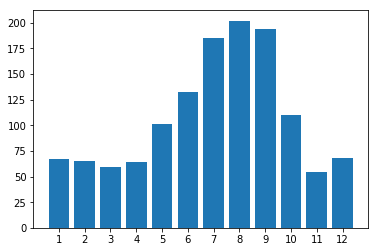

In [275]:
monthly_mean = df.groupby(['month'])['demand'].apply(lambda x: sum(x)/len(x))

plt.figure(figsize=(6, 4))
plt.bar([i for i in range(1, 13)], monthly_mean, label='demand')
plt.xticks([i for i in range(1, 13)])
plt.show()

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def base_mean(month, day, month_mean, day_mean):
    return month_mean[month], day_mean[day]

_, month, _, day = zip(*df.index.values)
month_base, day_base = zip(*[base_mean(index[1], index[3], monthly_mean, meanDemand) for index, row in df.iterrows()])
data = list(map(lambda x: list(x), zip(month, day, month_base, day_base)))
trainX, testX, trainY, testY = train_test_split(data, list(df[['demand']].demand))
reg = LinearRegression().fit(trainX, trainY)

In [273]:
reg.score(testX, testY)

0.8021136975442853

In [1]:
from utils.demandPredictor import *

model = demandPredictor()
model.train()

Score: 82.62%


In [3]:
model.predict([7, 6])

array([137.33565067])